In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# 读入数据
data = pd.read_csv('./data/airline-passengers.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


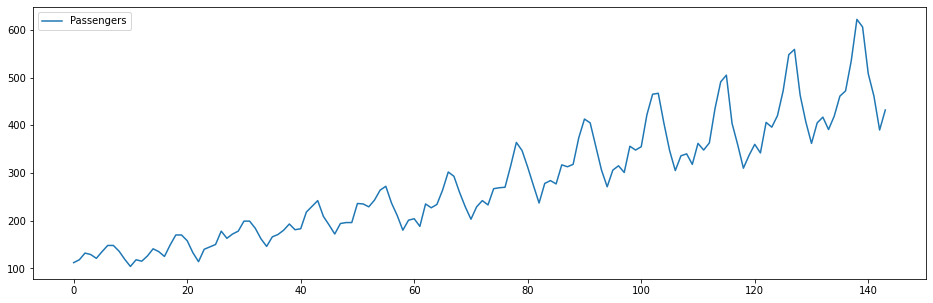

In [45]:
data.plot(figsize=(16,5))

**simple moving average**:
$$SMA_t = \frac{ x_t + x_{t-1} + x_{t-2} + ... + x_{t-M+1} } { M } $$




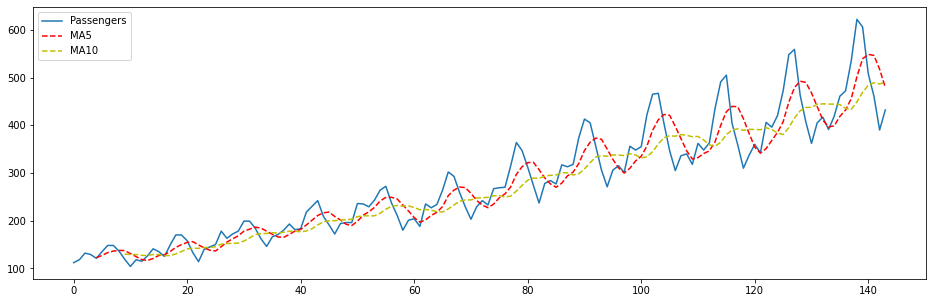

In [50]:
data['MA5']=data['Passengers'].rolling(5).mean()
data['MA10']=data['Passengers'].rolling(10).mean()
plt.figure(figsize=(16,5))
plt.plot(data['Passengers'], linestyle='-',label='Passengers')
plt.plot(data['MA5'],c='r', linestyle='--',label='MA5')
plt.plot(data['MA10'],c='y', linestyle='--',label='MA10')
plt.legend() # 是否显示图例
plt.show()

**Weighted moving average**:
$$WMA_t = \frac{ Mx_t + (M-1)x_{t-1} + (M-2)x_{t-2} + ... + x_{t-M+1} } { M+(M-1)+(M-2)+..+1 } $$




[0.06666667 0.13333333 0.2        0.26666667 0.33333333]


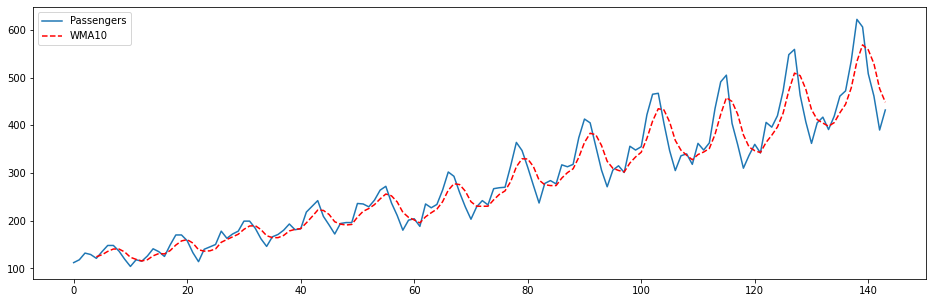

In [74]:
weights = np.arange(1,6).astype(float)
weights /=  np.sum(weights)
print(weights)
data['WMA10']=data['Passengers'].rolling(5).apply(lambda x: np.sum(x*weights))
plt.figure(figsize=(16,5))
plt.plot(data['Passengers'], linestyle='-',label='Passengers')
plt.plot(data['WMA10'],c='r', linestyle='--',label='WMA10')
plt.legend() # 是否显示图例
plt.show()

**exponiential moving average**:
$$EMA_t = \begin{cases}
x_0 & t=0 \\
\alpha x_t+ (1-\alpha)EMA_{t-1} & t>1
\end{cases} $$

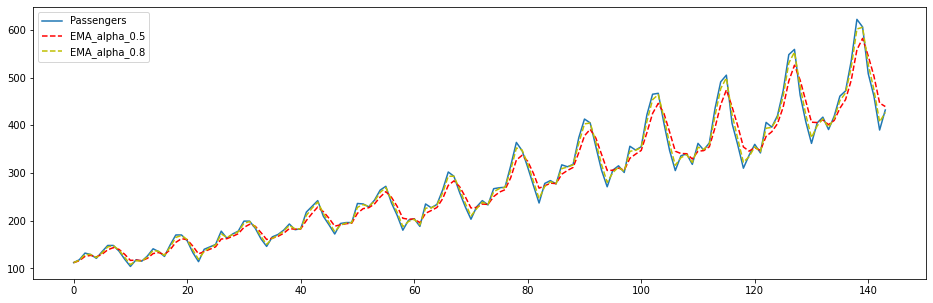

In [76]:
data['EMA_alpha_0.5']=data['Passengers'].ewm(alpha=0.5).mean()
data['EMA_alpha_0.8']=data['Passengers'].ewm(alpha=0.8).mean()
plt.figure(figsize=(16,5))
plt.plot(data['Passengers'], linestyle='-',label='Passengers')
plt.plot(data['EMA_alpha_0.5'],c='r', linestyle='--',label='EMA_alpha_0.5')
plt.plot(data['EMA_alpha_0.8'],c='y', linestyle='--',label='EMA_alpha_0.8')
plt.legend()#  是否显示图例
plt.show()